<a href="https://colab.research.google.com/github/Dhruvin3103/Yash_internship/blob/main/colab_notebooks/yash_works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imported libariess

In [ ]:
!pip install diffusers
!pip3 install cloudinary
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cloudinary: filename=cloudinary-1.39.0-py3-none-any.whl size=139597 sha256=55985d1cb96779ad432ee0666cbd52d31d6d27c0a3d285acd8fc716ca4139284
  Stored in directory: /root/.cache/pip/wheels/91/e4/0b/463760d46d684e44cb4ba08ce9be3c9792ef3dbbe927823997
Successfully built cloudinary
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cloudinary
# Import the cloudinary.api for managing assets
import cloudinary.api
# Import the cloudinary.uploader for uploading assets
import cloudinary.uploader

cloudinary.config(
    cloud_name="",
    api_key="",
    api_secret="",
    secure=True,
)

# stability diffusion 2

model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

depth_estimator/config.json:   0%|          | 0.00/9.96k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/490M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

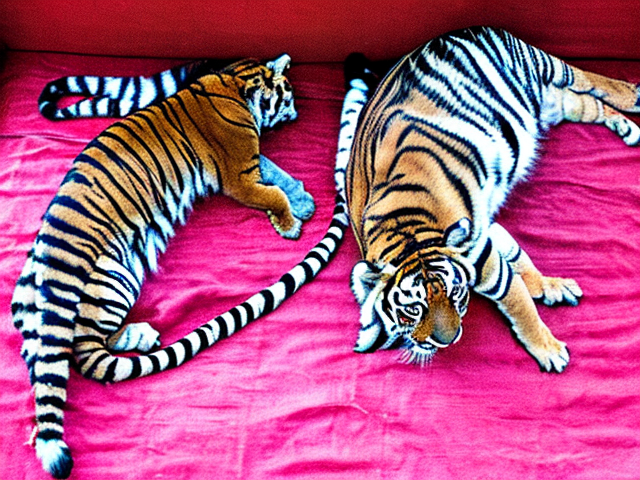

In [ ]:
import torch
import requests
from PIL import Image

from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
pipe.to("cuda")
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
init_image = Image.open(requests.get(url, stream=True).raw)
prompt = "two tigers"
n_propmt = "bad, deformed, ugly, bad anotomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=0.7).images[0]
image

# image segmentaion

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



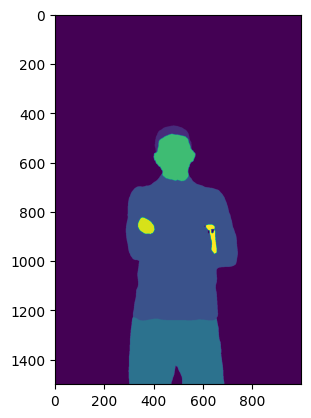

In [ ]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"

image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
print(pred_seg.tolist())
plt.imshow(pred_seg)


# image segmenation to obtain the mask image


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
from transformers import SegformerFeatureExtractor, TFSegformerForSemanticSegmentation
import requests
from IPython.display import display
import io

def load_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return np.array(img)
feature_extractor = SegformerFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = TFSegformerForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")
def get_binary_mask(input_img_url):
    input_img = load_image(input_img_url)
    input_img = Image.fromarray(input_img)
    inputs = feature_extractor(images=input_img, return_tensors="tf")
    outputs = model(**inputs)
    logits = outputs.logits
    logits = tf.transpose(logits, [0, 2, 3, 1])
    logits = tf.image.resize(logits, input_img.size[::-1])
    seg = tf.math.argmax(logits, axis=-1)[0]
    binary_mask = (seg.numpy() == 4).astype(np.uint8) * 255
    binary_mask_image = Image.fromarray(binary_mask, mode='L')
    binary_mask_image.thumbnail((512, 512))
    return binary_mask_image

In [ ]:
input_img_url = "https://humanaigc-outfitanyone.hf.space/--replicas/ppht9/file=/tmp/gradio/2f060521cb67195666c59ccd0e47ecc2587a4100/Simon_1.png"
output_binary_mask_resized = get_binary_mask(input_img_url)

def upload_image_to_cloudinary(image):
    temp_filename = "temp_image.jpg"
    image.save(temp_filename)
    result = cloudinary.uploader.upload(temp_filename)
    return result["url"]
cloudinary_url = upload_image_to_cloudinary(output_binary_mask_resized)
print(cloudinary_url)
display(output_binary_mask_resized)

# inpainting


In [ ]:
import PIL
import requests
import torch
from io import BytesIO
from diffusers import PaintByExamplePipeline, DDIMScheduler
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")
pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

pipe.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-plus_sd15.bin")

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


In [ ]:
img_url = (
    "https://humanaigc-outfitanyone.hf.space/--replicas/ppht9/file=/tmp/gradio/2f060521cb67195666c59ccd0e47ecc2587a4100/Simon_1.png"
)
mask_url = (
    "http://res.cloudinary.com/dcbnv0eyo/image/upload/v1710398852/bm71kaabu1rppzinbkrm.jpg"
)
example_url = "https://humanaigc-outfitanyone.hf.space/--replicas/ppht9/file=/tmp/gradio/65ff53dc99803d44d4e07facd195cda873856968/top5.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
example_image = download_image(example_url).resize((512, 512))

  0%|          | 0/50 [00:00<?, ?it/s]

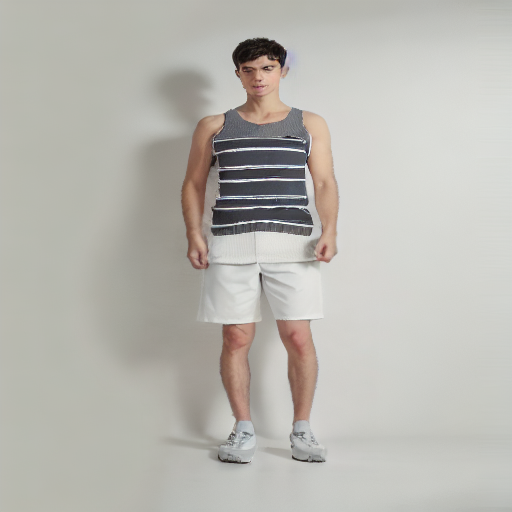

In [ ]:
image = pipe(image=init_image, mask_image=mask_image, example_image=example_image,guidance_scale=9,num_inference_steps=50).images[0]
image

In [ ]:
pipe

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.26.3",
  "_name_or_path": "runwayml/stable-diffusion-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

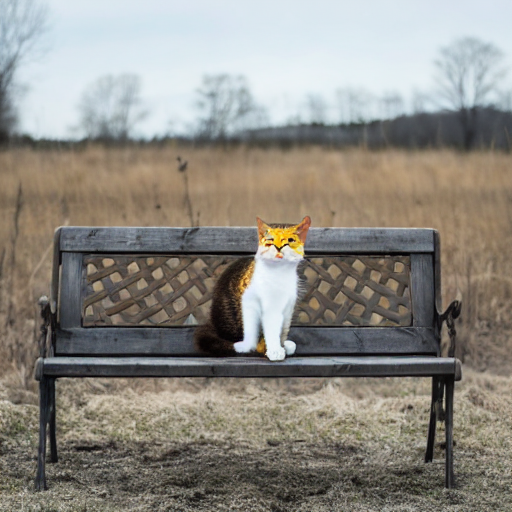

In [ ]:
import PIL
import requests
import torch
from io import BytesIO
from diffusers import StableDiffusionInpaintPipeline
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "Face of a yellow cat, high resolution, sitting on a park bench"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

In [ ]:
import cloudinary
import cloudinary.api
import cloudinary.uploader

cloudinary.config(
    cloud_name="dcbnv0eyo",
    api_key="614213718596938",
    api_secret="nf72_rLNSfPb7wS_aZtBSMjgkEw",
    secure=True,
)

# stable diffusion xl with refiner gpu memory exceeded 😞

In [ ]:
from diffusers import StableDiffusionXLInpaintPipeline
from diffusers.utils import load_image, make_image_grid
import torch

base = StableDiffusionXLInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

refiner = StableDiffusionXLInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")


In [ ]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = load_image(img_url)
mask_image = load_image(mask_url)

prompt = "A majestic tiger sitting on a bench"
num_inference_steps = 75
high_noise_frac = 0.7

image = base(
    prompt=prompt,
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=num_inference_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    num_inference_steps=num_inference_steps,
    denoising_start=high_noise_frac,
).images[0]
make_image_grid([init_image, mask_image, image.resize((512, 512))], rows=1, cols=3)

# stable diffusion xl using control net exceeding gpu memory

In [ ]:
from diffusers import StableDiffusionXLControlNetInpaintPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image
import numpy as np
import torch
from PIL import Image
import cv2

init_image = load_image(
    "https://huggingface.co/datasets/diffusers/test-arrays/resolve/main/stable_diffusion_inpaint/boy.png"
)
init_image = init_image.resize((1024, 1024))

generator = torch.Generator(device="cpu").manual_seed(1)

mask_image = load_image(
    "https://huggingface.co/datasets/diffusers/test-arrays/resolve/main/stable_diffusion_inpaint/boy_mask.png"
)
mask_image = mask_image.resize((1024, 1024))


def make_canny_condition(image):
    image = np.array(image)
    image = cv2.Canny(image, 100, 200)
    image = image[:, :, None]
    image = np.concatenate([image, image, image], axis=2)
    image = Image.fromarray(image)
    return image


control_image = make_canny_condition(init_image)

controlnet = ControlNetModel.from_pretrained(
    "diffusers/controlnet-canny-sdxl-1.0", torch_dtype=torch.float16
)
pipe = StableDiffusionXLControlNetInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", controlnet=controlnet, torch_dtype=torch.float16
)

pipe.enable_model_cpu_offload()

# generate image
image = pipe(
    "a handsome man with ray-ban sunglasses",
    num_inference_steps=20,
    generator=generator,
    eta=1.0,
    image=init_image,
    mask_image=mask_image,
    control_image=control_image,
).images[0]
image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
control_image

In [ ]:
init_image = load_image(
    "https://humanaigc-outfitanyone.hf.space/--replicas/ppht9/file=/tmp/gradio/2f060521cb67195666c59ccd0e47ecc2587a4100/Simon_1.png"
)
init_image = init_image.resize((1024, 1024))

generator = torch.Generator(device="cpu").manual_seed(1)

mask_image = load_image(
    "http://res.cloudinary.com/dcbnv0eyo/image/upload/v1710398852/bm71kaabu1rppzinbkrm.jpg"
)
mask_image = mask_image.resize((1024, 1024))

image = pipe(
    "a woman wearing a grey sweater with white stripes and a collar",
    num_inference_steps=20,
    generator=generator,
    eta=1.0,
    image=init_image,
    mask_image=mask_image,
    control_image=control_image,
).images[0]
image

# stable diffusion with control net

In [ ]:
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image
import numpy as np
import torch
from PIL import Image
import cv2


def make_canny_condition(image):
    image = np.array(image)
    image = cv2.Canny(image, 100, 200)
    image = image[:, :, None]
    image = np.concatenate([image, image, image], axis=2)
    image = Image.fromarray(image)
    return image
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_inpaint", torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")
pipe.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-plus_sd15.bin")

# pipe.enable_model_cpu_offload()
pipe.set_ip_adapter_scale(0.85)

In [ ]:
pipe

In [ ]:
init_image = load_image(
    "https://res.cloudinary.com/dcbnv0eyo/image/upload/v1710407079/f5pls67crdnmgqu2dbhh.png"
)
init_image = init_image.resize((512, 512))


mask_image = load_image(
    "http://res.cloudinary.com/dcbnv0eyo/image/upload/v1710408624/kjioldlfxjmj4elbpdui.jpg"
)
mask_image = mask_image.resize((512, 512))

garment_image = load_image(
    "https://humanaigc-outfitanyone.hf.space/--replicas/ppht9/file=/tmp/gradio/f3ba321017355c5a0c8051d3f438e881cc87b945/top222.JPG"
)
garment_image = garment_image.resize((512, 512))

def make_canny_condition(image):
    image = np.array(image)
    image = cv2.Canny(image, 100, 200)
    image = image[:, :, None]
    image = np.concatenate([image, image, image], axis=2)
    image = Image.fromarray(image)
    return image

generator = torch.Generator(device="cpu").manual_seed(5)
control_image = make_canny_condition(init_image)

prompt = "a person wearing a a red and blue t - shirt with a white and blue logo"
negative_prompt = " bad anatomy, worst quality, low quality, disfigured, blurred"
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=100,
    generator=generator,
    strength=1,
    ip_adapter_image=garment_image,
    eta=1.0,
    guidance_scale=7.5,
    image=init_image,
    mask_image=mask_image,
    control_image=control_image,
).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

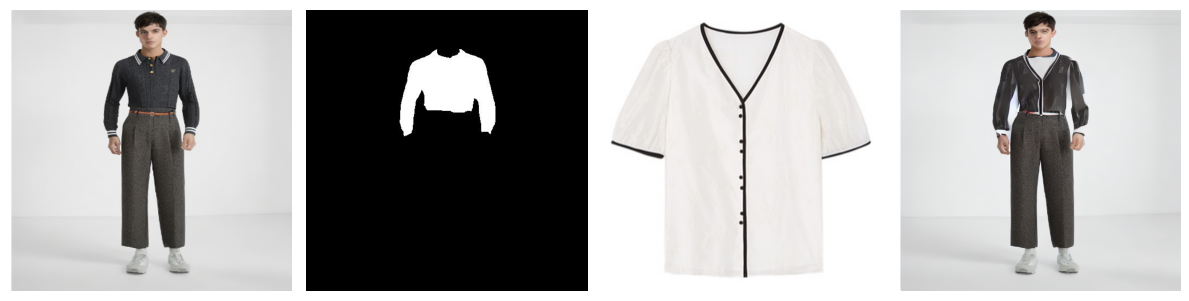

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(init_image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mask_image)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(garment_image)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image)
plt.axis('off')

plt.tight_layout()
plt.show()


# getting positive and negative prompts from gemini

In [ ]:
def get_prompts(url):
  genai.configure(api_key="<api_key>")
  generation_config = {
    "temperature": 0.4,
    "top_p": 1,
    "top_k": 32,
    "max_output_tokens": 4096,
  }
  model = genai.GenerativeModel(model_name="gemini-1.0-pro-vision-latest",
                                generation_config=generation_config,)
  img = requests.get(url, stream=True)
  # img =
  image_parts = [
    {
      "mime_type": "image/jpeg",
      "data": img.content
    },
  ]

  prompt_parts = [
    """
explain the details of garment in detail as i have a model which generate images on the mask area of an image based on the text and i want to generate the same image as this so give me a proper prompt for this and a negative prompt too in json format""",
    image_parts[0],
    "\n\n",
  ]

  response = model.generate_content(prompt_parts)
  return response.text

In [ ]:
get_prompts("")